In [24]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.fft as fft

# Colonne da dimenticare
- Timestamp (inutile la fequenza di misurazione è la stessa)
- Log Mode (always 100)
- Log Freq (always 5)

Frequency data-acquisition = 100 Hz

In [2]:
data = pd.read_csv("../Data/1_Stave_supine_static.txt", sep='\t')[14:].reset_index(drop=True)
data = data.drop(columns=["Log Mode","Log Freq", "Timestamp"])
data.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,52.399,215.513,1011.929,-18.41463,-17.19512,5.609756,-185,-163,-347,0.873321,0.111484,0.038270,0.472671
1,57.645,224.175,1015.162,-12.68293,-19.51220,4.146341,-186,-161,-349,0.873439,0.112522,0.037812,0.472243
2,37.759,232.349,1046.760,-10.73171,-32.92683,-1.219512,-187,-162,-350,0.873657,0.113895,0.037019,0.471572
3,17.324,203.618,1053.409,-12.31707,-42.31707,-2.195122,-191,-161,-352,0.874040,0.115207,0.035554,0.470656
4,-68.869,196.298,1071.221,-10.60976,-39.39024,6.341464,-193,-160,-351,0.874111,0.116398,0.034364,0.470321


In [3]:
data.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
count,9156.000000,9156.000000,9156.000000,9156.000000,9156.000000,9156.000000,9156.000000,9156.000000,9156.000000,9156.000000,9156.000000,9156.000000,9156.000000
mean,25.144122,-7.267172,-789.539513,-3.826146,8.038818,-4.597452,-12.275448,101.319353,479.857252,0.067646,0.587210,0.599596,0.037498
std,172.107998,182.384049,480.951076,81.082160,88.713673,53.041888,93.142076,68.057760,233.978870,0.196645,0.360386,0.308370,0.161489
min,-3626.000000,-2989.000000,-3626.000000,-1864.024000,-1594.146000,-1264.024000,-742.000000,-332.000000,-498.000000,0.001983,-0.942686,-0.727622,-0.938475
25%,38.064000,18.117000,-929.335000,-2.682927,1.585366,0.243902,2.000000,102.000000,547.000000,0.006464,0.704428,0.706351,0.027772
50%,43.371000,21.167000,-922.991000,-2.560976,1.707317,0.365854,3.000000,103.000000,549.000000,0.007619,0.705588,0.707602,0.028199
75%,47.153000,23.851000,-913.719000,-2.439024,1.829268,0.487805,4.000000,104.000000,550.000000,0.009235,0.706626,0.708518,0.028596
max,1960.000000,2793.000000,5733.000000,3614.878000,3932.195000,519.878100,326.000000,633.000000,570.000000,0.997440,0.945555,0.748161,0.860775


In [4]:
print(np.cov(data.values.T))

[[ 2.96211629e+04  4.04767059e+03 -1.06297122e+04  2.64615102e+02
  -2.40636100e+03  1.49223801e+03 -4.81733379e+03  4.18710894e+02
   3.34022731e+03 -5.70465377e+00  1.42231865e+01  1.81812996e+00
  -4.34319514e+00]
 [ 4.04767059e+03  3.32639414e+04 -3.24669748e+04 -2.88361563e+03
  -2.08887427e+03  2.15803307e+03  1.54310503e+03 -6.22241585e+03
   1.46816455e+04 -1.40919200e+01  3.38441950e+01  1.80031120e+01
  -1.31027444e+00]
 [-1.06297122e+04 -3.24669748e+04  2.31313937e+05 -9.67010246e+02
   8.11300613e+03 -4.50619785e+03 -2.17278614e+04  3.05565326e+03
  -1.02453044e+05  8.32397149e+01 -9.41713640e+01 -7.83101876e+01
   1.64810014e+01]
 [ 2.64615102e+02 -2.88361563e+03 -9.67010246e+02  6.57431670e+03
   1.05211124e+03  1.17010141e+02  4.07897995e+02  5.62850688e+02
   6.59359077e+02 -1.31974468e-02  6.57289521e-02  7.28174015e-01
   2.27324495e+00]
 [-2.40636100e+03 -2.08887427e+03  8.11300613e+03  1.05211124e+03
   7.87011579e+03  8.65621874e+02 -9.40881144e+02  1.13243805e+02


In [21]:
# PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA() # model

new_data = pca.fit_transform(scaled_data)
np.cumsum(pca.explained_variance_ratio_)


array([0.34493112, 0.47484378, 0.5968649 , 0.68932727, 0.76458337,
       0.83160315, 0.88879807, 0.92857954, 0.95653268, 0.97572656,
       0.98767479, 0.99605054, 1.        ])

In [ ]:
# To check (advanced method to non-linear dimentional reduction)
#x = TSNE(n_components=4, perplexity=30.0, early_exaggeration=4.0, method="exact").fit_transform(data.values)

In [35]:
data_pca = pd.DataFrame(new_data[:,0:7])
data_pca

,0,1,2,3,4,5,6
0,5.966893,4.680887,-3.413663,-0.973500,-1.794485,1.077693,0.203840
1,5.965585,4.654729,-3.422224,-0.944938,-1.855084,1.105353,0.239297
2,5.991450,4.626671,-3.414405,-1.103633,-1.935013,1.167235,0.313417
3,6.054849,4.560925,-3.339257,-1.191283,-1.954230,1.154322,0.302283
4,6.104823,4.715801,-3.115242,-1.315960,-1.720480,1.237438,0.353979
...,...,...,...,...,...,...,...
9151,5.308131,-5.474882,-0.332463,1.321530,2.156790,0.475507,-0.570881
9152,5.283374,-5.588212,-0.516617,1.326306,1.924779,0.454332,-0.569808
9153,5.340635,-5.724114,-0.600500,1.379140,1.788961,0.443605,-0.562644
9154,5.444403,-5.873923,-0.598339,1.432437,1.654391,0.458446,-0.563978


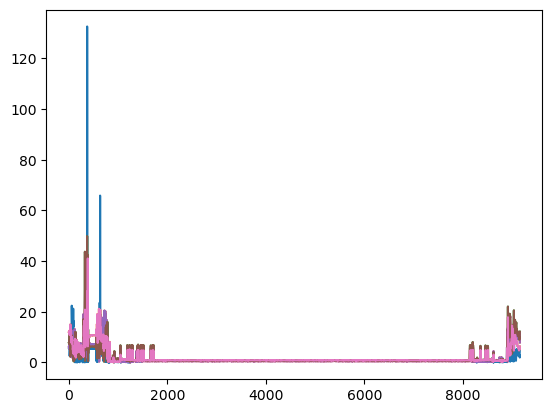

In [46]:
fft_data = fft.fft(data_pca,)
plt.plot(np.abs(fft_data))

In [33]:
data_pca

,0,1,2,3,4
0,5.966893,4.680887,-3.413663,-0.973500,-1.794485
1,5.965585,4.654729,-3.422224,-0.944938,-1.855084
2,5.991450,4.626671,-3.414405,-1.103633,-1.935013
3,6.054849,4.560925,-3.339257,-1.191283,-1.954230
4,6.104823,4.715801,-3.115242,-1.315960,-1.720480
...,...,...,...,...,...
9151,5.308131,-5.474882,-0.332463,1.321530,2.156790
9152,5.283374,-5.588212,-0.516617,1.326306,1.924779
9153,5.340635,-5.724114,-0.600500,1.379140,1.788961
9154,5.444403,-5.873923,-0.598339,1.432437,1.654391


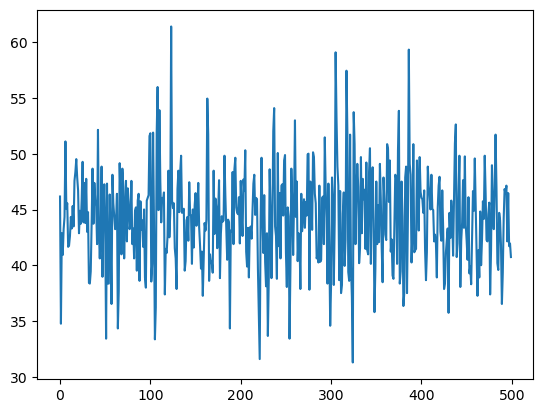

In [45]:
plt.plot(np.arange(len(data["AccX"][2000:2500])),data["AccX"][2000:2500])
plt.show()